<a href="https://colab.research.google.com/github/leorr/AI/blob/main/Projeto_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINKS REFERÊNCIAS:

Classify Images Using Python & Machine Learning - https://www.youtube.com/watch?v=iGWbqhdjf2s

 CNN Com cachorros e gatos - https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

 what-are-max-pooling-average-pooling-global-max-pooling https://github.com/christianversloot/machine-learning-articles/blob/main/what-are-max-pooling-average-pooling-global-max-pooling-and-global-average-pooling.md

 Global Max Pool https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool2D

Multiprocessing https://stackoverflow.com/questions/55531427/how-to-define-max-queue-size-workers-and-use-multiprocessing-in-keras-fit-gener

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers
import os
import pandas as pd
import seaborn as sn

IMG_SIZE = 50


In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    'Downloads/DATA',
    validation_split=0.2,
    subset="training",
    label_mode='categorical',
    seed=123,
    shuffle=True,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  'Downloads/DATA',
  validation_split=0.2,
  subset="validation",
  label_mode='categorical',
  seed=123,
  shuffle=True,
  image_size=(IMG_SIZE, IMG_SIZE),
  batch_size=32)

class_names = train_ds.class_names
val_samples   = len(val_ds.file_paths)
train_samples = len(train_ds.file_paths)

Found 16130 files belonging to 3 classes.
Using 12904 files for training.
Found 16130 files belonging to 3 classes.
Using 3226 files for validation.


In [3]:
base_model = tf.keras.applications.EfficientNetB0(weights='imagenet',
                                             include_top=False,
                                             input_shape=(IMG_SIZE,IMG_SIZE,3),
                                             pooling="max")
x=base_model.output
x=tf.keras.layers.Dropout(0.5)(x)
preds=tf.keras.layers.Dense(3, activation='softmax')(x)  
model = tf.keras.models.Model(
    inputs=base_model.input,
    outputs=preds
)

for l in model.layers:
  if l.name.split('_')[0] != 'dense':
    l.trainable=False
  else:
    l.trainable=True

In [ ]:
model.summary()

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

step_size_train=-(-train_samples//32)
step_size_val = -(-val_samples//32)

print("step_size_val=" + str(step_size_val) + " step_size_train="+ str(step_size_train))


history = model.fit(
    x=train_ds,
    steps_per_epoch=step_size_train,
    epochs=500,
    validation_data=val_ds,
    validation_steps=step_size_val)

step_size_val=101 step_size_train=404
Epoch 1/500
404/404 [==============================] - 42s 92ms/step - loss: 0.4182 - accuracy: 0.8345 - val_loss: 0.2309 - val_accuracy: 0.9148
Epoch 2/500
404/404 [==============================] - 37s 91ms/step - loss: 0.2882 - accuracy: 0.8927 - val_loss: 0.2112 - val_accuracy: 0.9216
Epoch 3/500
404/404 [==============================] - 37s 91ms/step - loss: 0.2720 - accuracy: 0.8975 - val_loss: 0.2016 - val_accuracy: 0.9272
Epoch 4/500
404/404 [==============================] - 37s 91ms/step - loss: 0.2638 - accuracy: 0.8997 - val_loss: 0.2007 - val_accuracy: 0.9272
Epoch 5/500
404/404 [==============================] - 37s 91ms/step - loss: 0.2624 - accuracy: 0.9016 - val_loss: 0.1946 - val_accuracy: 0.9315
Epoch 6/500
404/404 [==============================] - 37s 92ms/step - loss: 0.2577 - accuracy: 0.9025 - val_loss: 0.2012 - val_accuracy: 0.9244
Epoch 7/500
404/404 [==============================] - 37s 91ms/step - loss: 0.2558 - accura

In [ ]:
results = model.evaluate_generator(val_ds, 15)
print('Acc: %.3f, Loss: %.3f' % (results[1], results[0]))
print(history.history.keys())

C:\Users\leona\AppData\Local\Temp\ipykernel_10260\3470705721.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  results = model.evaluate_generator(val_ds, 15)


Acc: 0.742, Loss: 0.663
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


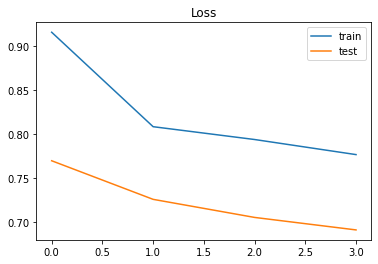

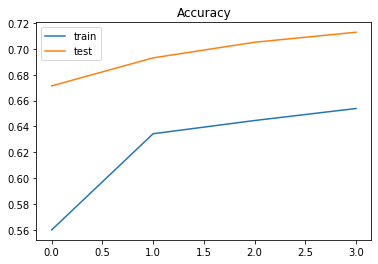

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
print()
print()
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
num_epochs      = len(history.history['val_loss'])
lr_value        = model.optimizer.get_config()['learning_rate']
base_model_name = base_model.name

final_name  = base_model_name + "_valSamples<" + str(val_samples) + ">"
final_name += "_train_sample<" + str(train_samples) + ">" + "_lr<" + str(lr_value) + ">" +"_num_epochs<" + str(num_epochs) + ">"

model.save(final_name)

In [ ]:
predictions = model.predict(val_ds, steps = 2)
y_pred = np.argmax(predictions, axis=-1)
val_labels=val_ds.class_names
classification = classification_report(val_labels, y_pred)
print(classification)
matrix = confusion_matrix(val_labels, y_pred)
df_cm = pd.DataFrame(matrix, index = [i for i in range(3)],
                  columns = [i for i in range(3)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, linewidths=2.5)

2/2 [==============================] - 1s 42ms/step


ValueError: ignored

In [ ]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL.Image

def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.



def get_class(prediction):
    i = 0
    for each in predicition[0]:
        if (each>0.5):
            if(i == 0):
                return 'cat'
            if(i == 1):
                return 'dog'
            if(i == 2):
                return 'wild'
        i+=1
    return 'unknown'

PIC_PATH='Downloads/haha/babv.jpg'

predicition = model.predict([prepare(PIC_PATH)])
source=PIL.Image.open(PIC_PATH)
source=source.resize((IMG_SIZE,IMG_SIZE))
print(predicition)
get_class(predicition)
plt.imshow(source)
plt.title(get_class(predicition))


2/2 [==============================] - 0s 5ms/step
[[0.04814051 0.10776462 0.8440949 ]
 [       nan        nan        nan]]


Text(0.5, 1.0, 'This image most likely belongs to wild with a 51.81 percent confidence.')

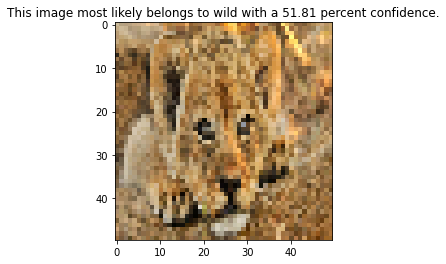

In [ ]:
img = tf.keras.utils.load_img(
    PIC_PATH, target_size=(IMG_SIZE, IMG_SIZE))

img_array = tf.keras.utils.img_to_array(img)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
plt.imshow(img)
print(predictions)
plt.title(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))